# Task-4 Graduate Rotational Internship Program (GRIP - SEP 2022) organised by The Sparks Foundation.
# Author: VISHAL NIMESH (Intern FEB 2022)

# Exploratory Data Analysis - Terrorism

# Que.
Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.

# Aim:
To find out the hot zone of terrorism and derive all security issues and insights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
t = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1', low_memory=False)
t.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
t.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
t.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
t.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


1-We can see that we have around 135 coulumns.

2-We aim at finding the hot zones so we can drop outher columns.

3-dropping other columns will be a tedious task, so it is better to create a new variable wherein we will take only important coumns.

In [8]:
trr=t[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
trr.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
trr.shape

(181691, 18)

In [10]:
trr.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

1-We need to make sure if there is any value in day or month as 0.

2-We have too many missing values in some columns, before handling them we need to know their percentage.

In [13]:
count=0
for i in trr['Day']:
    if i ==0:
        count=count+1
    else:
        count=count
print('Number of Days entered as 0: ',count)

Number of Days entered as 0:  891


In [14]:
cnt=0
for i in trr['Month']:
    if i ==0:
        cnt=cnt+1
    else:
        cnt=cnt
print('Number of Months entered as 0: ',cnt)

Number of Months entered as 0:  20


We are assigning random dates and months who have their values as 0, so that we don't loose the information of other columns associated with that row

In [15]:
trr['Day'] = trr['Day'].apply(lambda x: np.random.randint(1,32) if x == 0 else x)
trr['Month'] = trr['Month'].apply(lambda x: np.random.randint(1,13) if x == 0 else x)

C:\Users\VISHAL~1\AppData\Local\Temp/ipykernel_12468/1784770684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trr['Day'] = trr['Day'].apply(lambda x: np.random.randint(1,32) if x == 0 else x)
C:\Users\VISHAL~1\AppData\Local\Temp/ipykernel_12468/1784770684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trr['Month'] = trr['Month'].apply(lambda x: np.random.randint(1,13) if x == 0 else x)


In [16]:
#checking for days
count=0
for i in trr['Day']:
    if i ==0:
        count=count+1
    else:
        count=count
print('Number of Days entered as 0: ',count)

Number of Days entered as 0:  0


In [17]:
#checking for months
cnt=0
for i in trr['Month']:
    if i ==0:
        cnt=cnt+1
    else:
        cnt=cnt
print('Number of Months entered as 0: ',cnt)

Number of Months entered as 0:  0


# Finding missing value percentage

In [18]:
def null_val_(trr): 
    null_val = trr.isnull().sum()
    null_val_p = 100 * trr.isnull().sum()/len(trr)
    null_val_ = pd.concat([null_val, null_val_p], axis=1)
    null_val_last = null_val_.rename(
    columns = {0 : 'Null Values', 1 : 'Percentage '})
    return null_val_last
null_val_(trr)

,Null Values,Percentage
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Country,0,0.000000
state,421,0.231712
Region,0,0.000000
city,434,0.238867
latitude,4556,2.507554
longitude,4557,2.508104
AttackType,0,0.000000


In [19]:
trr['Motive'].fillna(value='NA', inplace=True) 
trr['Summary'].fillna(value='NA', inplace=True)
trr['city'].fillna(value='NA', inplace=True)
trr['Target'].fillna(value='NA', inplace=True)
trr["Killed"].fillna(trr["Killed"].mean(), inplace=True)
trr["Wounded"].fillna(trr["Wounded"].mean(), inplace=True)
trr["latitude"].fillna(trr["latitude"].mean(), inplace=True)
trr["longitude"].fillna(trr["longitude"].mean(), inplace=True)
trr['state'].fillna(value='NA', inplace=True)

C:\Users\vishal nimesh\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


1-We saw that some Coloumns had High missing values, we needed to handle them.

2-All the coloumns with 'object' datatype have been replace by NA for the missing values so that we don't loose information associated with them.

3-Similarly we have replaced all columns with float datatype with their respective mean.

In [20]:
trr.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

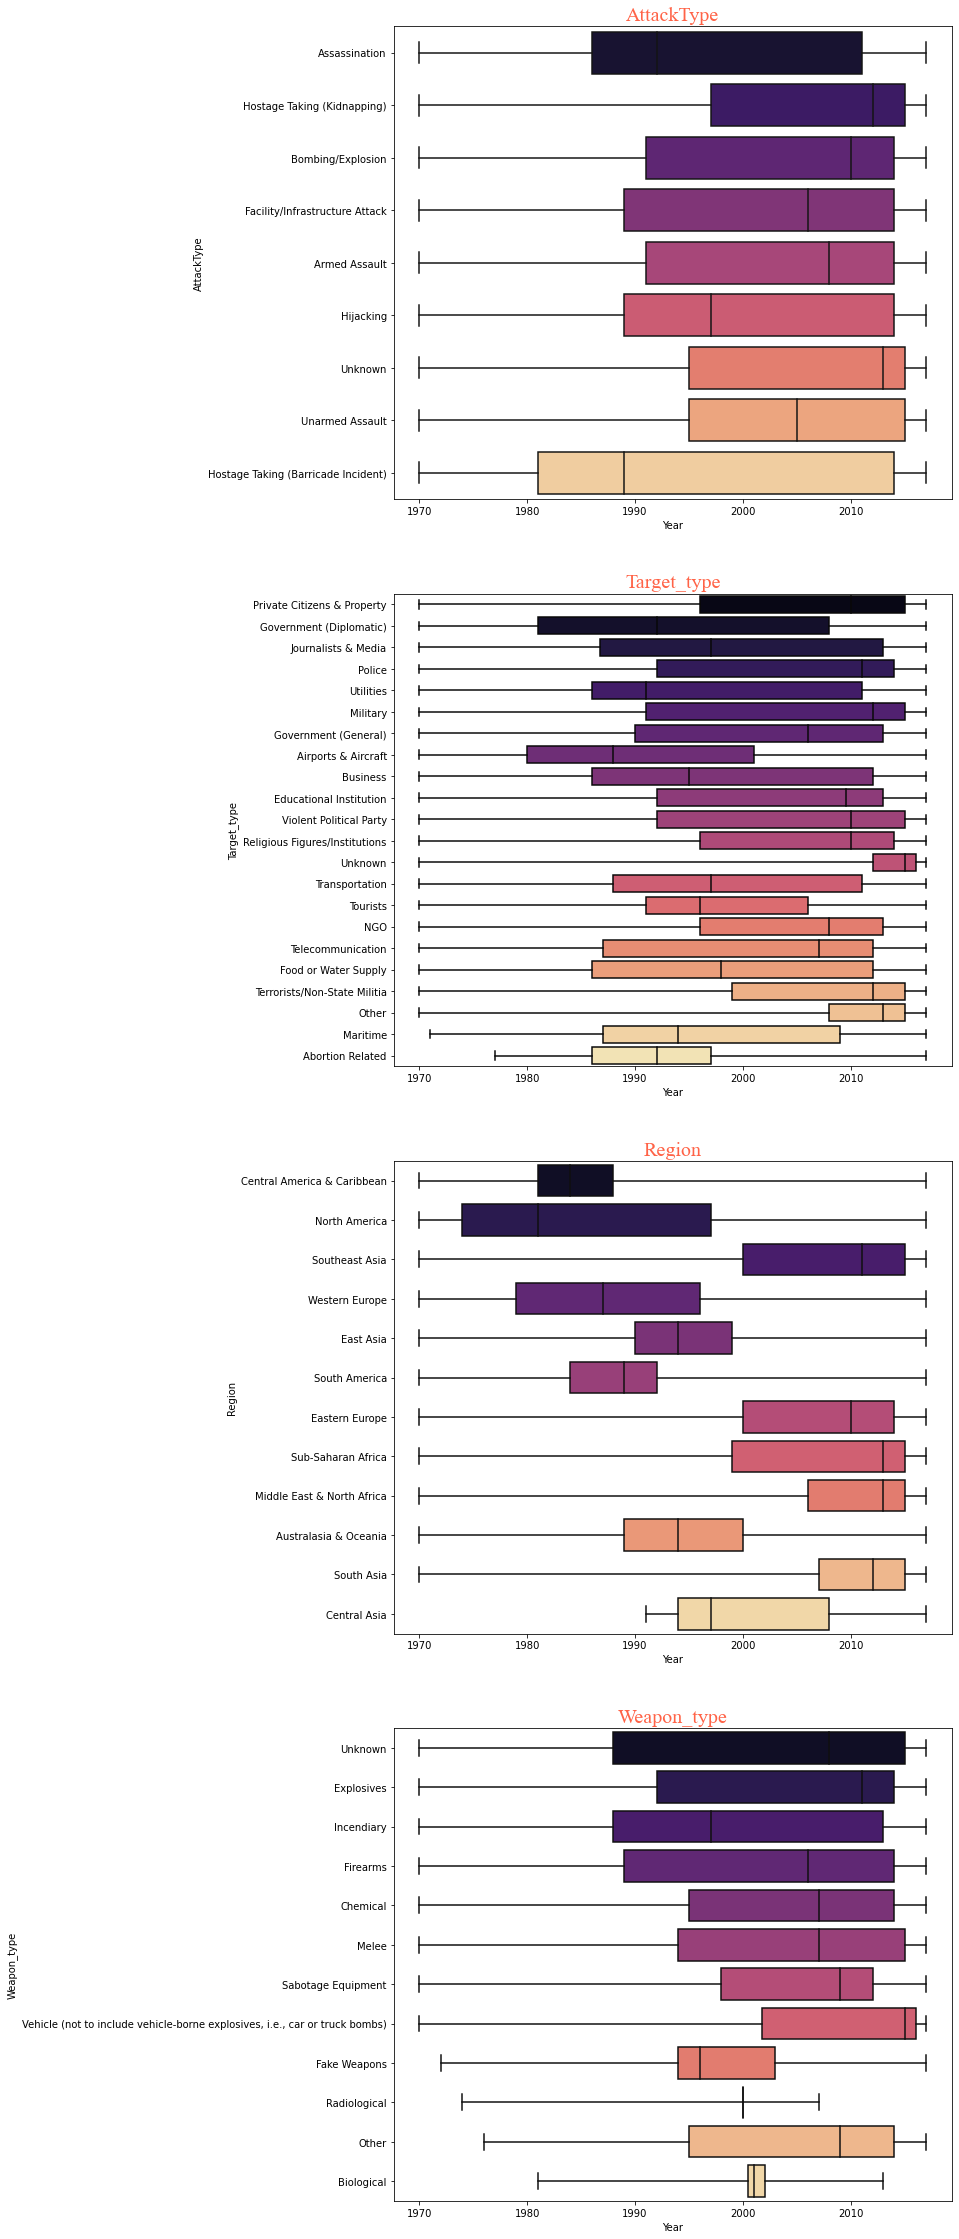

In [21]:
title_style = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 20 }
dict = {'AttackType':1,'Target_type':2,  'Region':3, 'Weapon_type':4 }
plt.figure(figsize=(10,40))

for value, i in dict.items():
    plt.subplot(4,1,i)
    sns.boxplot(x="Year", y=value, data=trr, whis=[0, 100], palette="magma")
    plt.title(value , fontdict = title_style)
plt.show()

<AxesSubplot:>

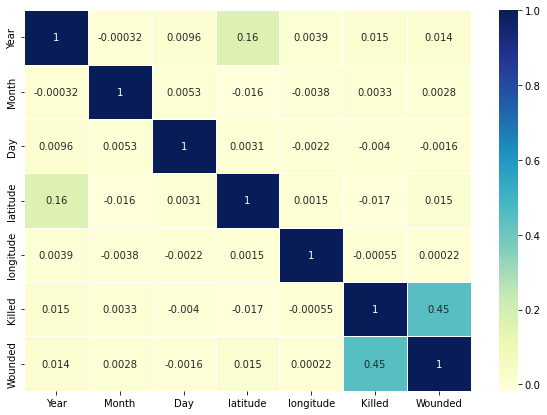

In [22]:
plt.figure(figsize = (10,7))
sns.heatmap(trr.corr(), cmap="YlGnBu", annot=True, xticklabels='auto', yticklabels='auto', linewidth=1 )

# Terrorist Activities each year

C:\Users\vishal nimesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


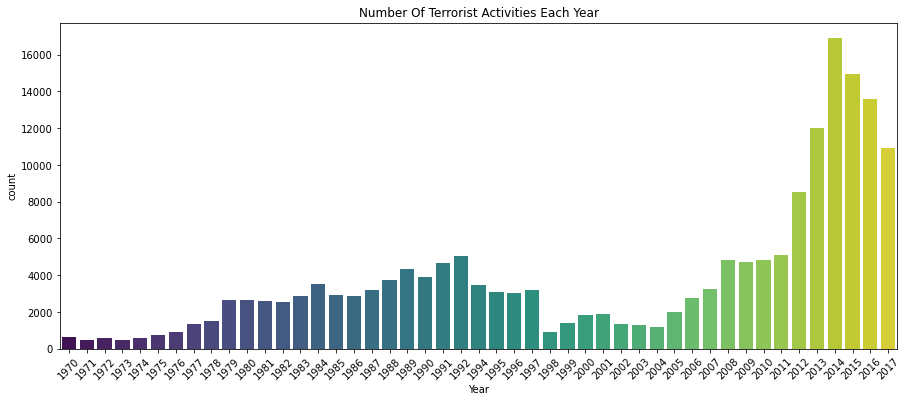

In [23]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=trr,palette="viridis")
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

1-There has been a gradual increase in Terror Activities since 2004.

2-Highest number of terror activities occurred in the year 2014.

3-After 2014 the terror activities started to decrease.

# Terrorist Activities in each Year w.r.t region

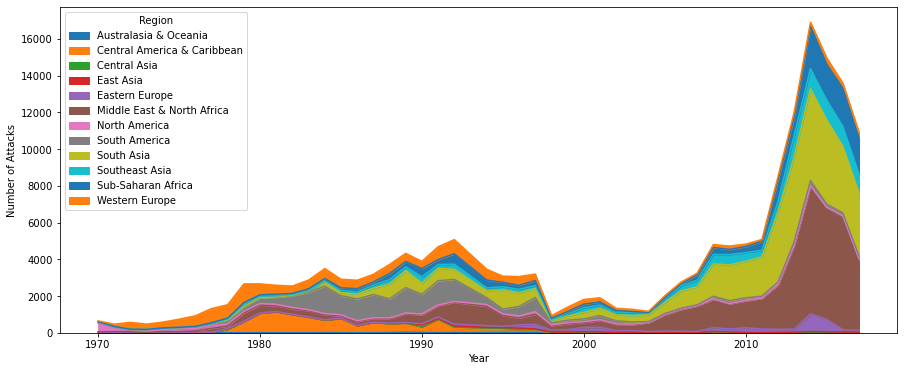

In [24]:
pd.crosstab(trr.Year, trr.Region).plot(kind='area',figsize=(15,6))
plt.ylabel('Number of Attacks')
plt.show()

1-Maximum Attacks have been in Central America, followed by Australasia in the year 2010.

2-There have been very less terror casualties in: East Asia, North America.

3-In East Asia the number of attack gradually reduced to 0 after the year 1990

# Top 10 countries to be affected with Terror Attacks

C:\Users\vishal nimesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


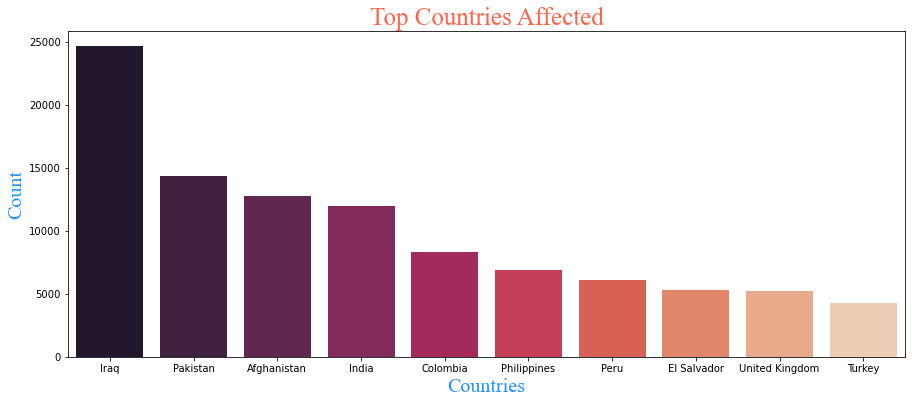

In [29]:
plt.subplots(figsize=(15,6))
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
sns.barplot(trr['Country'].value_counts()[:10].index, trr['Country'].value_counts()[:10].values,palette='rocket')
plt.title('Top Countries Affected', fontdict=style1 )
plt.xlabel('Countries' , fontdict=style2 )
plt.ylabel('Count', fontdict=style2 )
#plt.xticks(rotation= 90)
plt.show()

In [30]:
weapon_cross = pd.crosstab(trr["Weapon_type"], trr["Region"])
weapon_cross

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Weapon_type,,,,,,,,,,,,
Biological,0,0,0,2,0,1,24,1,2,0,3,2
Chemical,11,2,2,17,12,73,26,26,83,11,12,46
Explosives,80,3149,254,333,3089,32283,1557,9098,22568,5039,6319,8657
Fake Weapons,0,0,1,4,4,6,5,3,3,0,1,6
Firearms,74,5679,232,41,1461,11877,682,6525,15169,5634,7499,3651
Incendiary,74,435,15,252,186,1181,897,1077,2285,837,840,3056
Melee,10,65,14,82,90,1227,74,131,998,147,478,339
Other,1,0,0,3,4,23,18,6,16,4,19,20
Radiological,0,0,0,10,0,0,1,0,1,0,0,2


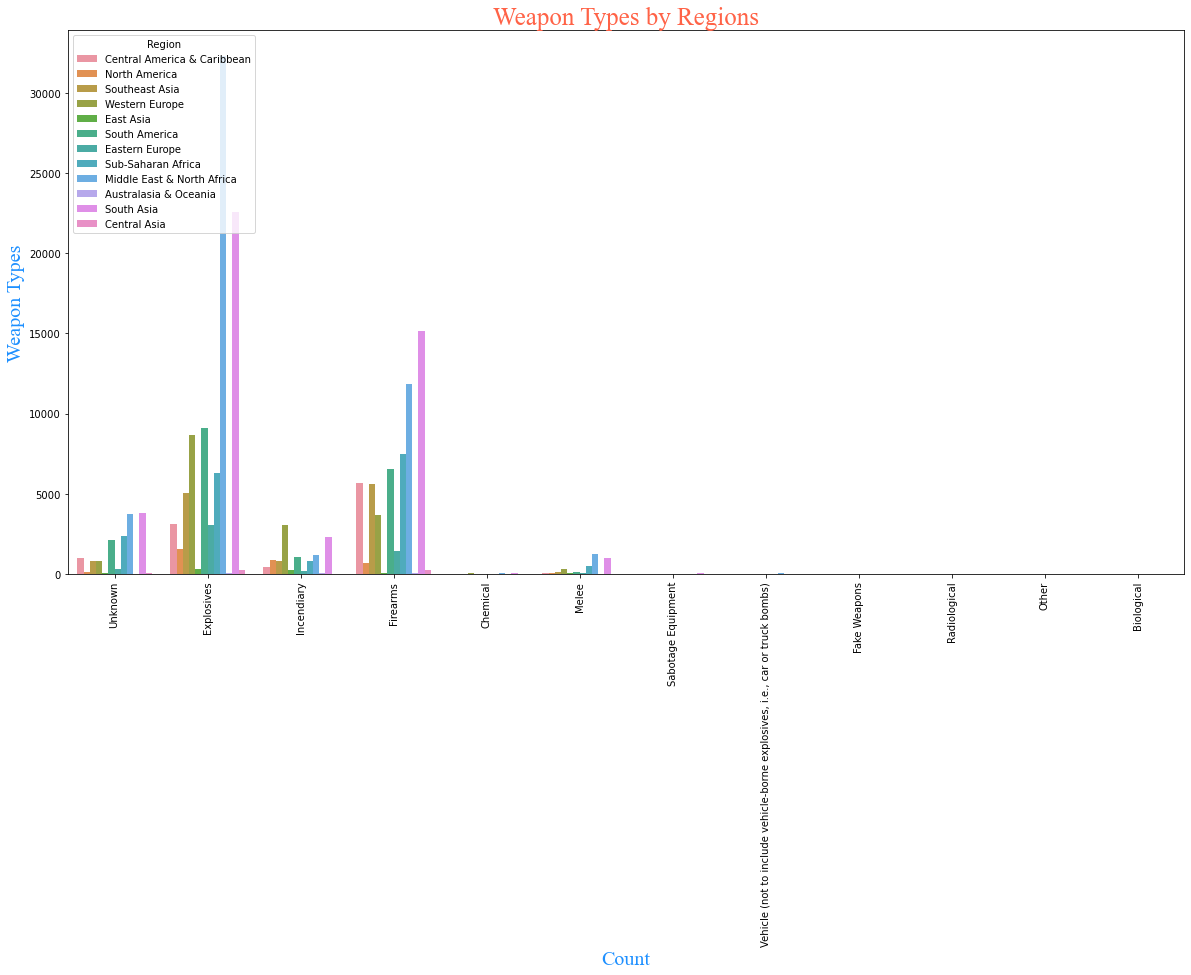

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x="Weapon_type", hue="Region", data=trr)
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
plt.title("Weapon Types by Regions", fontdict = style1)
plt.ylabel("Weapon Types", fontdict = style2 )
plt.xlabel("Count", fontdict = style2)
plt.xticks(rotation=90)
plt.show()

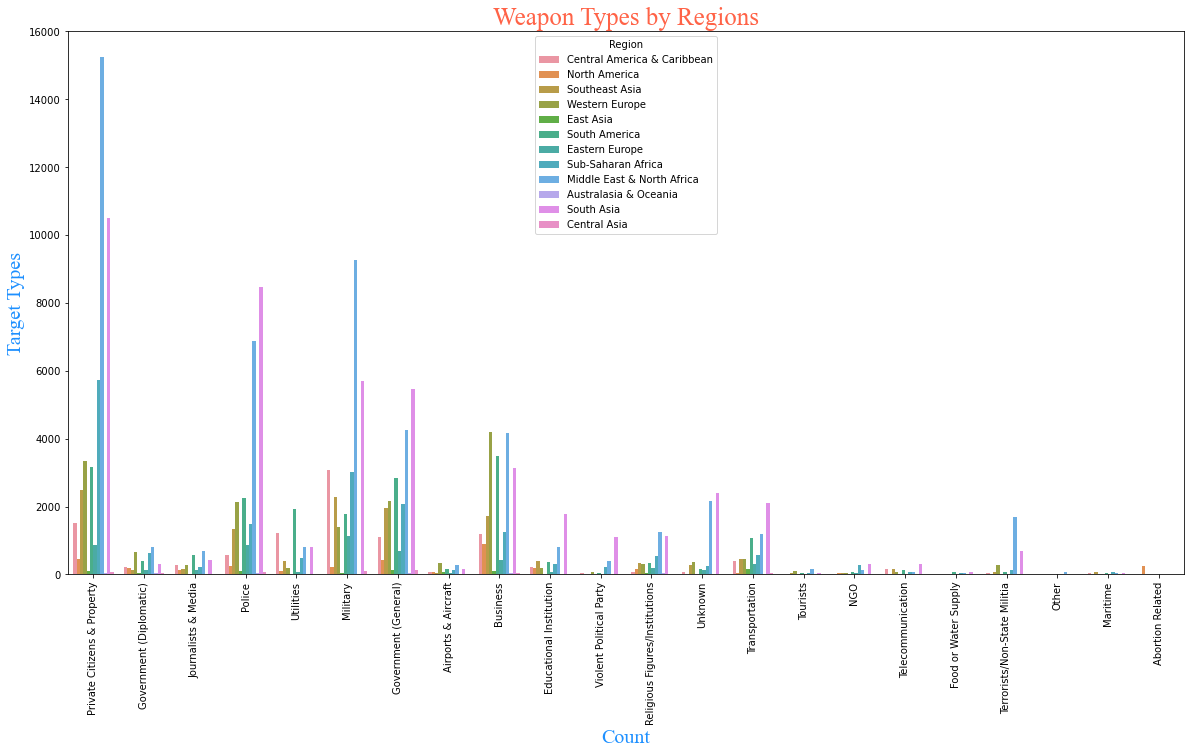

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x="Target_type", hue="Region", data=trr)
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
plt.title("Weapon Types by Regions", fontdict = style1)
plt.ylabel("Target Types", fontdict = style2 )
plt.xlabel("Count", fontdict = style2)
plt.xticks(rotation=90)
plt.show()

1-In middle East region most attacks have been carried out on Private citizens followed by military.

2-Most of the transportation and violent political party attacks have been witnessed by the South Asian Countries.

3-The South Asian countries need to tighten up security measures in the police, military, Government, Business,cational, and religious sectors.

# Evaluating

In [33]:
print("Country with the most attacks:",trr['Country'].value_counts().idxmax())
print("City with the most attacks:",trr['city'].value_counts().index[1]) 
print("Region with the most attacks:",trr['Region'].value_counts().idxmax())
print("Year with the most attacks:",trr['Year'].value_counts().idxmax())
print("Month with the most attacks:",trr['Month'].value_counts().idxmax())
print("Group with the most attacks:",trr['Group'].value_counts().index[1])
print("Most Attack Types:",trr['AttackType'].value_counts().idxmax())
print("Most Target Types:",trr['Target_type'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
Most Target Types: Private Citizens & Property


Conclusion
There has been a gradual increase in Terror Activities since 2004.

Highest number of terror activities occurred in the year 2014.

After 2014 the terror activities started to decrease.

Maximum Attacks have been in Central America, followed by Australasia in the year 2010.

There have been very less terror casualties in: East Asia, North America.

In East Asia the number of attacks gradually reduced to 0 after the year 1990.

The Worst Attack took place in the US in the year 2001 with a total casualty of 9574.

After the 9/11 attack the security measures in the US were escalated in such a way that no attacks took place until the year 2017.

Kenya had the 2nd worst attack in the 1998 with 4224 Casualties, after that proper security measures were taken to avoid any such incident.

Russia had its worst attack in the year 2004 with 1071 casualties, since then there has been no major attack.

Mostly there is usage of Explosives and Firearms as Weapons.

In middle East region most attacks have been carried out on Private citizens followed by military.

Most of the transportation and violent political party attacks have been witnessed by the South Asian Countries.

The South Asian countries need to tighten up security measures in the police, military, Government, Business, Educational, and religious sectors.